<a href="https://colab.research.google.com/github/ayaemad10/Arduino_Robotics/blob/main/model_conjuntion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
import seaborn as sb
import numpy as np

In [33]:
data = pd.read_csv("/content/2024_S1_cdm_ccsds_AE.csv")
df = pd.DataFrame(data)
# df
# df.head()
df.shape

(185511, 117)

In [34]:
df

,conjunction_id,comment_header,creation_date,originator,message_id,event_id,comment_relative_metadata_data,tca,miss_distance,relative_speed,...,object2_ctdot_t,object2_ctdot_n,object2_ctdot_rdot,object2_ctdot_tdot,object2_cndot_r,object2_cndot_t,object2_cndot_n,object2_cndot_rdot,object2_cndot_tdot,object2_cndot_ndot
0,4708712,COMMENT,45:37.2,SMS,sms9_4708712,3059662,COMMENT,02:05.5,360.998008,4152.541202,...,0,0,0,0,0,0,0,0,0,0
1,4796676,COMMENT,07:39.0,SMS,sms9_4796676,3108026,COMMENT,02:42.5,230.331161,6774.705183,...,0,0,0,0,0,0,0,0,0,0
2,4714477,COMMENT,25:34.0,SMS,sms9_4714477,3062731,COMMENT,03:50.8,203.939751,8049.963408,...,0,0,0,0,0,0,0,0,0,0
3,4411173,COMMENT,09:39.8,SMS,sms9_4411173,2896647,COMMENT,06:15.3,391.652906,9631.056058,...,0,0,0,0,0,0,0,0,0,0
4,4654350,COMMENT,52:44.5,SMS,sms9_4654350,3030325,COMMENT,06:16.3,394.310175,1069.289496,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185506,20197927,COMMENT,14:17.7,SMS,sms9_20197927,13044740,COMMENT,05:49.9,168.425138,9618.794587,...,0,0,0,0,0,0,0,0,0,0
185507,20181700,COMMENT,56:00.3,SMS,sms9_20181700,13034454,COMMENT,18:31.0,444.130312,4636.791118,...,0,0,0,0,0,0,0,0,0,0
185508,20197921,COMMENT,22:17.1,SMS,sms9_20197921,13044734,COMMENT,25:09.5,283.171212,6950.171927,...,0,0,0,0,0,0,0,0,0,0
185509,20199709,COMMENT,08:59.2,SMS,sms9_20199709,13045885,COMMENT,42:21.7,495.218933,4647.079751,...,0,0,0,0,0,0,0,0,0,0


In [35]:
for col in df.columns:
    print(col)

conjunction_id
comment_header
creation_date
originator
message_id
event_id
comment_relative_metadata_data
tca
miss_distance
relative_speed
relative_position_r
relative_position_t
relative_position_n
relative_velocity_r
relative_velocity_t
relative_velocity_n
start_screen_period
stop_screen_period
screen_volume_radius
collision_probability
collision_probability_method
collision_max_probability
collision_max_pc_method
previous_message_id
comment_object1_metadata
object1_object_designator
object1_catalog_name
object1_object_name
object1_international_designator
object1_object_type
object1_ephemeris_name
object1_covariance_method
object1_maneuverable
object1_orbit_center
object1_ref_frame
object1_cov_type
comment_object1_od_parameters
comment_object1_data_additional_parameters
object1_area_pc
object1_area_pc_max
object1_hbr
comment_object1_state_vector
object1_x
object1_y
object1_z
object1_x_dot
object1_y_dot
object1_z_dot
comment_object1_covmatrix
object1_cr_r
object1_ct_r
object1_ct_t
ob

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185511 entries, 0 to 185510
Columns: 117 entries, conjunction_id to object2_cndot_ndot
dtypes: float64(36), int64(41), object(40)
memory usage: 165.6+ MB


In [37]:
# for l in df:
#     if df.dtypes==object:
# #         print(l)
# print(dict(df.dtypes))
# for i in dict(df.dtypes):
#     if  =="dtype('object')":
#         print(i)
# print(dict(df.dtypes))
print(list(df.select_dtypes('object')))

['comment_header', 'creation_date', 'originator', 'message_id', 'comment_relative_metadata_data', 'tca', 'start_screen_period', 'stop_screen_period', 'collision_probability_method', 'collision_max_pc_method', 'comment_object1_metadata', 'object1_catalog_name', 'object1_object_name', 'object1_international_designator', 'object1_object_type', 'object1_ephemeris_name', 'object1_covariance_method', 'object1_maneuverable', 'object1_orbit_center', 'object1_ref_frame', 'object1_cov_type', 'comment_object1_od_parameters', 'comment_object1_data_additional_parameters', 'comment_object1_state_vector', 'comment_object1_covmatrix', 'comment_object2_metadata', 'object2_catalog_name', 'object2_object_name', 'object2_international_designator', 'object2_object_type', 'object2_ephemeris_name', 'object2_covariance_method', 'object2_maneuverable', 'object2_orbit_center', 'object2_ref_frame', 'object2_cov_type', 'comment_object2_od_parameters', 'comment_object2_data_additional_parameters', 'comment_object2

In [38]:
df.collision_probability

,collision_probability
0,3.418000e-06
1,2.093830e-05
2,1.844090e-08
3,7.100090e-08
4,2.045680e-08
...,...
185506,6.763880e-08
185507,9.093400e-07
185508,2.207340e-08
185509,8.399640e-08


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["object1_object_type"] = label_encoder.fit_transform(df["object1_object_type"])
df["object2_object_type"] = label_encoder.fit_transform(df["object2_object_type"])
print(df["object1_object_type"].head(103))
print(df["object2_object_type"].head(103))

0      1
1      2
2      1
3      1
4      1
      ..
98     1
99     1
100    0
101    1
102    1
Name: object1_object_type, Length: 103, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
98     1
99     1
100    0
101    1
102    1
Name: object2_object_type, Length: 103, dtype: int64


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["object1_object_type"] = label_encoder.fit_transform(df["object1_object_type"])
df["object1_object_type"]
print(df["object1_object_type"].head(200))

0      1
1      2
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    0
199    0
Name: object1_object_type, Length: 200, dtype: int64


In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["object2_object_type"] = label_encoder.fit_transform(df["object2_object_type"])
df["object2_object_type"]
print(df["object2_object_type"].head(200))

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    0
Name: object2_object_type, Length: 200, dtype: int64


In [42]:
X = df.drop(labels=['collision_probability'],axis=1)
y = df['collision_probability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [43]:
X_train

,conjunction_id,comment_header,creation_date,originator,message_id,event_id,comment_relative_metadata_data,tca,miss_distance,relative_speed,...,object2_ctdot_t,object2_ctdot_n,object2_ctdot_rdot,object2_ctdot_tdot,object2_cndot_r,object2_cndot_t,object2_cndot_n,object2_cndot_rdot,object2_cndot_tdot,object2_cndot_ndot
151740,15801031,COMMENT,52:49.9,SMS,sms9_15801031,10108641,COMMENT,05:23.1,309.758354,8713.803232,...,0,0,0,0,0,0,0,0,0,0
173737,18651099,COMMENT,09:57.8,SMS,sms9_18651099,12149591,COMMENT,54:35.0,394.341206,7993.496679,...,0,0,0,0,0,0,0,0,0,0
155035,16433772,COMMENT,38:02.5,SMS,sms9_16433772,10522405,COMMENT,59:32.3,395.988490,0.464616,...,0,0,0,0,0,0,0,0,0,0
177565,18917007,COMMENT,32:13.0,SMS,sms9_18917007,12304114,COMMENT,12:47.2,136.389343,6962.308823,...,0,0,0,0,0,0,0,0,0,0
57930,9047472,COMMENT,01:14.3,SMS,sms9_9047472,5622106,COMMENT,24:23.1,326.434267,4637.904313,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,10896695,COMMENT,45:58.4,SMS,sms9_10896695,6812124,COMMENT,36:57.5,242.415103,4648.101062,...,0,0,0,0,0,0,0,0,0,0
65615,9392258,COMMENT,09:19.4,SMS,sms9_9392258,5924023,COMMENT,49:21.8,144.575656,3613.032004,...,0,0,0,0,0,0,0,0,0,0
77655,10536010,COMMENT,23:16.0,SMS,sms9_10536010,6605868,COMMENT,37:08.0,313.276269,10237.648310,...,0,0,0,0,0,0,0,0,0,0
56088,8790257,COMMENT,49:57.8,SMS,sms9_8790257,5346184,COMMENT,33:18.5,421.113687,4613.181619,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y_train

,collision_probability
151740,3.982360e-05
173737,8.275520e-07
155035,1.372000e-06
177565,1.602870e-07
57930,4.950940e-06
...,...
82270,8.198410e-06
65615,1.678720e-06
77655,1.882850e-06
56088,4.480860e-06


In [45]:
print(X_train.isnull().sum())

conjunction_id        0
comment_header        0
creation_date         0
originator            0
message_id            0
                     ..
object2_cndot_t       0
object2_cndot_n       0
object2_cndot_rdot    0
object2_cndot_tdot    0
object2_cndot_ndot    0
Length: 116, dtype: int64


In [46]:
print(np.any(np.isnan(X_train.select_dtypes(include=np.number))))

True


In [47]:
X_train = X_train.interpolate(limit_direction='both')

/tmp/ipython-input-1553044895.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  X_train = X_train.interpolate(limit_direction='both')


In [48]:
print(X_train.isnull().sum())

conjunction_id        0
comment_header        0
creation_date         0
originator            0
message_id            0
                     ..
object2_cndot_t       0
object2_cndot_n       0
object2_cndot_rdot    0
object2_cndot_tdot    0
object2_cndot_ndot    0
Length: 116, dtype: int64


In [49]:
print(np.any(np.isnan(X_train.select_dtypes(include=np.number))))

True


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# correlation = data.corr()
# plt.figure(figsize=(102,102))
# sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

# plt.title('Correlation between different fearures')

In [51]:
# first 12 features except 'risk'
df_copy = X_train[['conjunction_id','event_id', 'miss_distance', 'relative_speed','relative_position_r', 'relative_position_t', 'relative_position_n',
    'relative_velocity_r','relative_velocity_t', 'relative_velocity_n','screen_volume_radius','collision_max_probability']]
df_copy

,conjunction_id,event_id,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,screen_volume_radius,collision_max_probability
151740,15801031,10108641,309.758354,8713.803232,3.599530,250.134629,182.674433,-36.688508,-5115.492431,7054.130557,5000,0.002610
173737,18651099,12149591,394.341206,7993.496679,383.768007,-77.140941,-47.711410,-6.422471,-4212.572223,6793.392611,5000,0.000047
155035,16433772,10522405,395.988490,0.464616,-374.039206,45.467321,-121.796055,-0.021382,0.409462,0.218521,5000,0.000003
177565,18917007,12304114,136.389343,6962.308823,-136.286808,5.050680,-1.565087,9.282874,-3192.234033,-6187.349986,5000,0.000015
57930,9047472,5622106,326.434267,4637.904313,207.966301,239.548262,76.980374,-6.061728,-1415.935560,4416.474403,5000,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...
82270,10896695,6812124,242.415103,4648.101062,169.916766,-165.063264,-51.453801,-1.617662,-1425.027686,4424.266827,5000,0.000026
65615,9392258,5924023,144.575656,3613.032004,101.636200,99.521550,25.839201,-7.528999,-860.374754,3509.088038,5000,0.000028
77655,10536010,6605868,313.276269,10237.648310,-126.743319,-208.973604,195.980062,15.121004,-6902.095860,-7561.103557,5000,0.000097
56088,8790257,5346184,421.113687,4613.181619,170.882065,366.039438,-118.958762,0.843386,-1404.400557,-4394.212445,5000,0.000049


<Axes: >

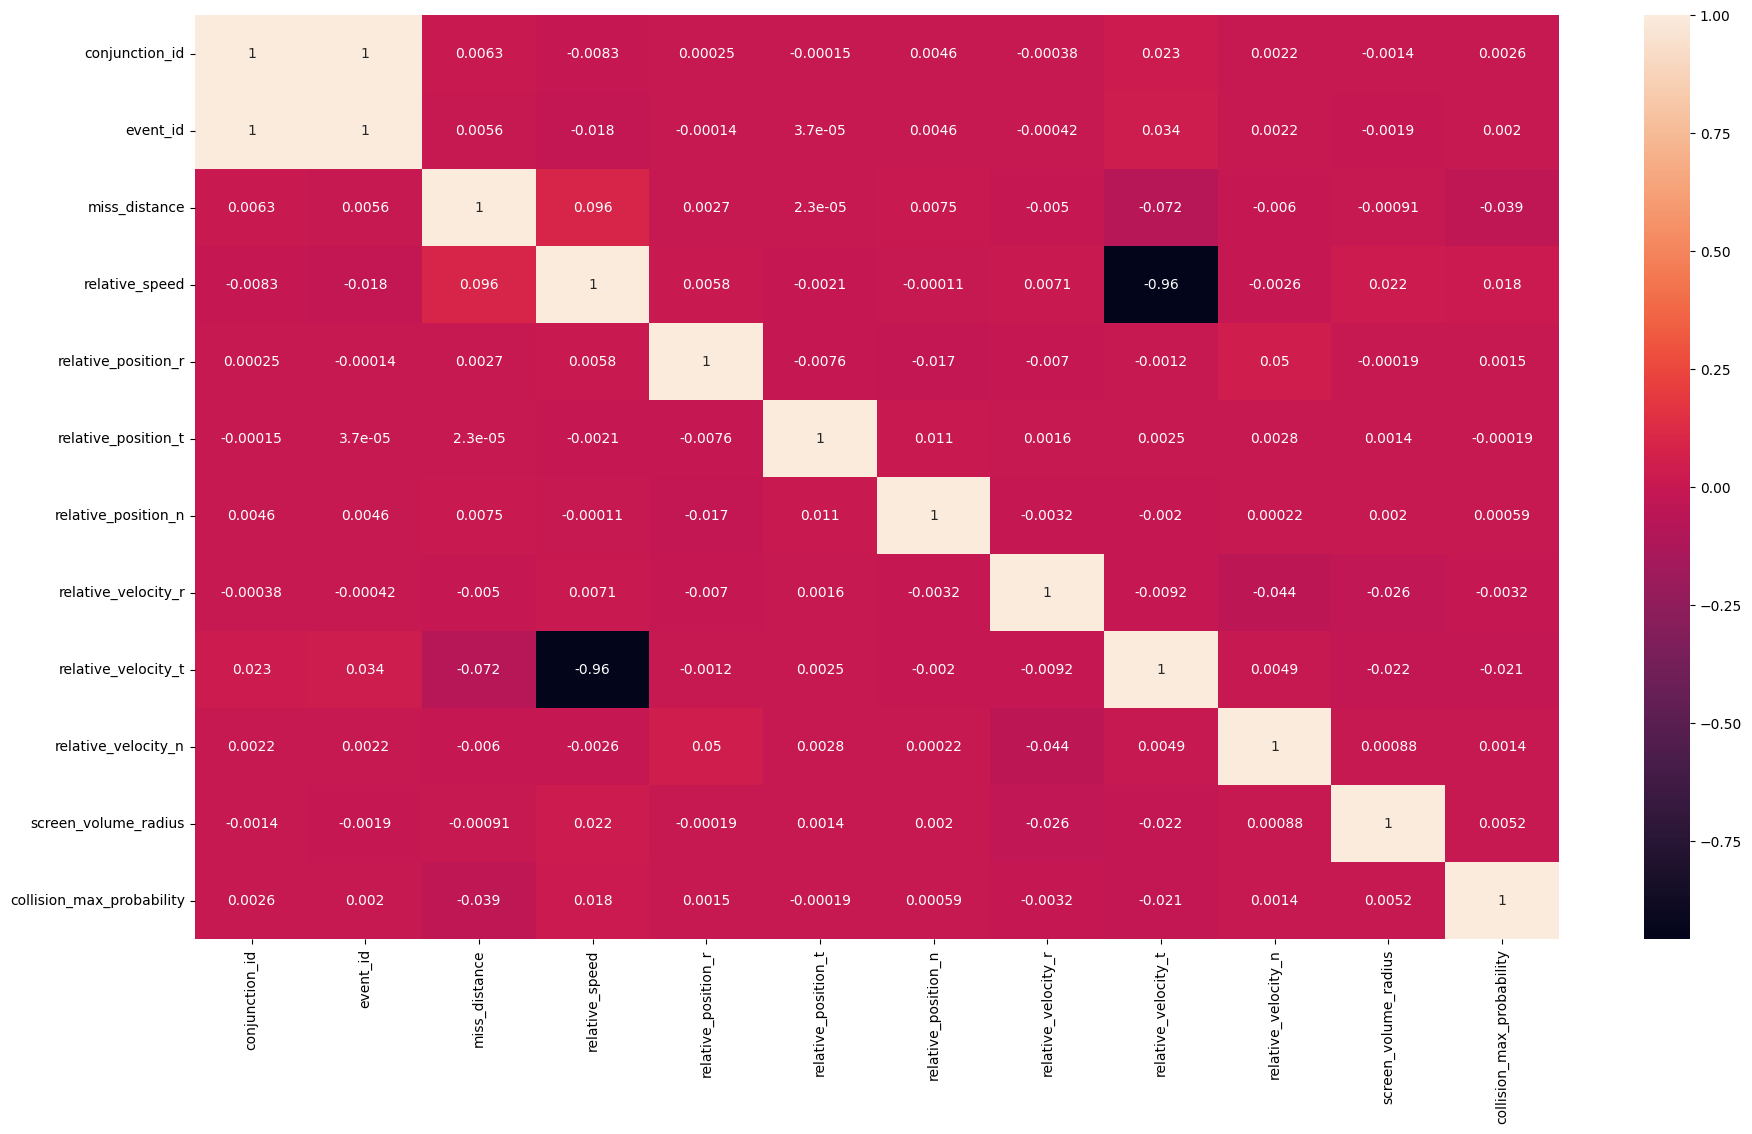

In [52]:
plt.figure(figsize=(22,12))
# Drop non-numeric columns before calculating correlation
df_copy_numeric = df_copy.select_dtypes(include=np.number)
sns.heatmap(df_copy_numeric.corr(), annot =True)

In [53]:
string_cols_to_drop = list(df.select_dtypes('object'))

<Axes: title={'center': 'Correlation with collision'}>

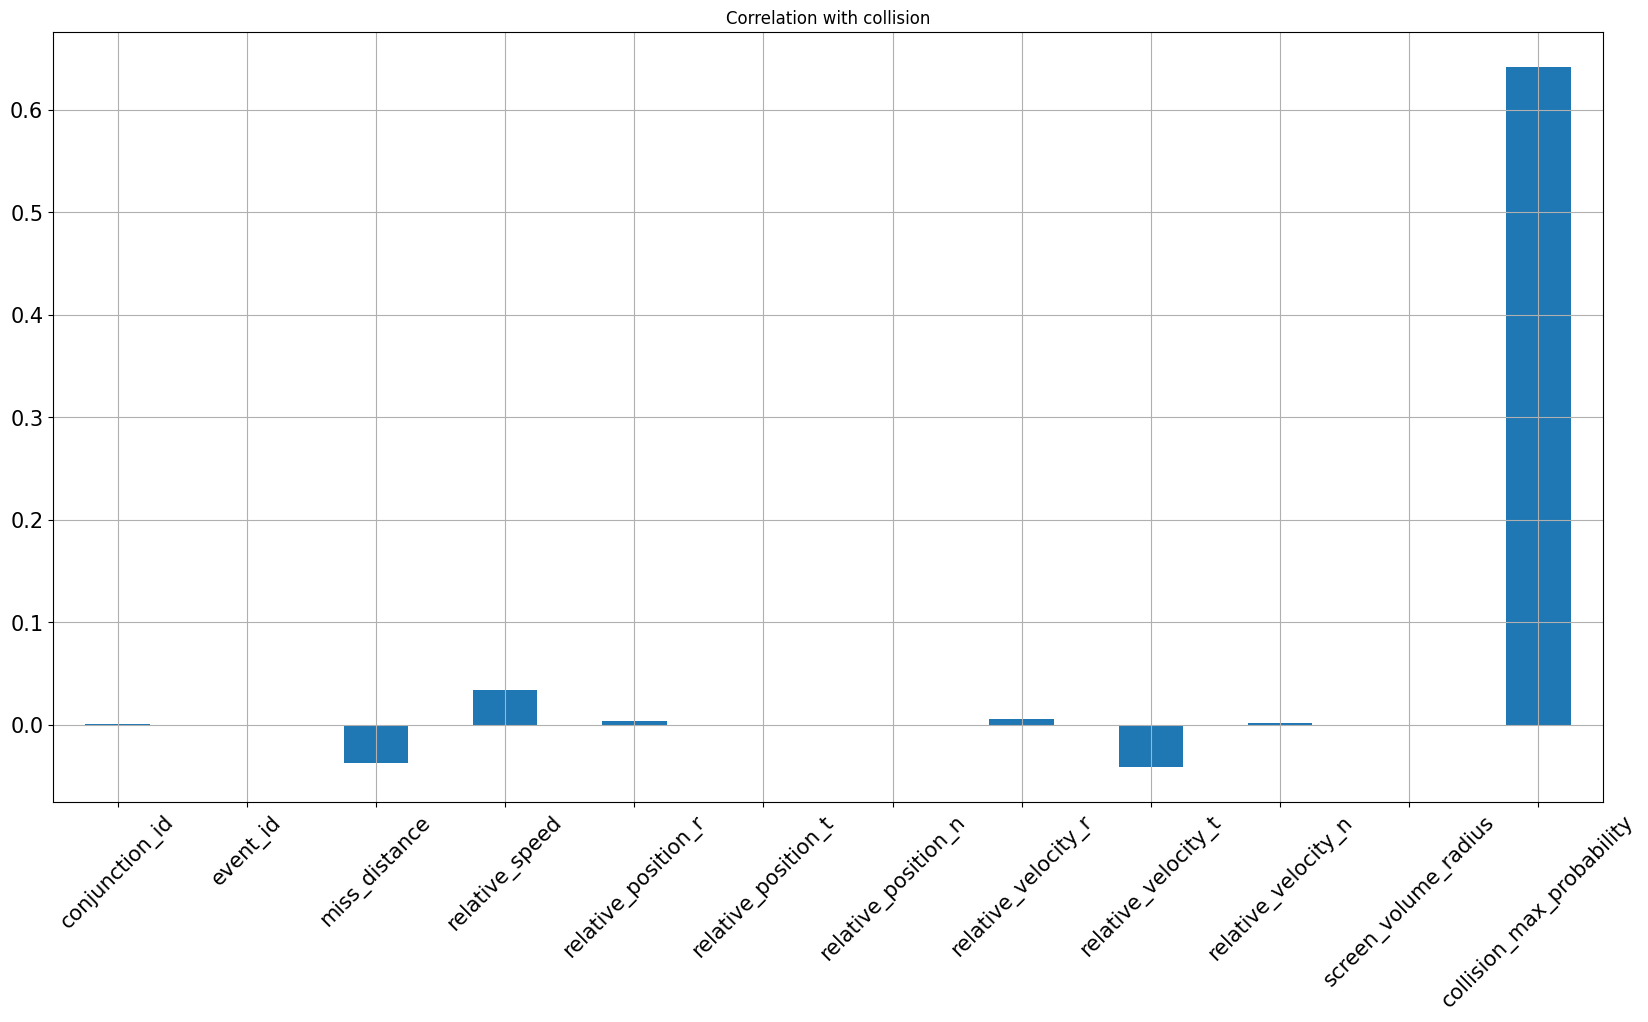

In [54]:
df_copy_numeric.corrwith(df.collision_probability).plot.bar(figsize=(20,10),title="Correlation with collision",fontsize=15,rot=45,grid=True)

In [55]:
print(X_train.columns.tolist())

['conjunction_id', 'comment_header', 'creation_date', 'originator', 'message_id', 'event_id', 'comment_relative_metadata_data', 'tca', 'miss_distance', 'relative_speed', 'relative_position_r', 'relative_position_t', 'relative_position_n', 'relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n', 'start_screen_period', 'stop_screen_period', 'screen_volume_radius', 'collision_probability_method', 'collision_max_probability', 'collision_max_pc_method', 'previous_message_id', 'comment_object1_metadata', 'object1_object_designator', 'object1_catalog_name', 'object1_object_name', 'object1_international_designator', 'object1_object_type', 'object1_ephemeris_name', 'object1_covariance_method', 'object1_maneuverable', 'object1_orbit_center', 'object1_ref_frame', 'object1_cov_type', 'comment_object1_od_parameters', 'comment_object1_data_additional_parameters', 'object1_area_pc', 'object1_area_pc_max', 'object1_hbr', 'comment_object1_state_vector', 'object1_x', 'object1_y', 'object1_z'

In [56]:
#Select next 16 features (object2 position, velocity, and covariance terms)
df_copy1 = X_train[["object1_x","object1_y","object1_z","object1_x_dot","object1_y_dot","object1_z_dot","object1_cr_r","object1_ct_t","object1_cn_n","object2_x","object2_y","object2_z","object2_x_dot","object2_y_dot","object2_z_dot","object2_cr_r","object2_ct_t","object2_cn_n"
]
]
df_copy1

,object1_x,object1_y,object1_z,object1_x_dot,object1_y_dot,object1_z_dot,object1_cr_r,object1_ct_t,object1_cn_n,object2_x,object2_y,object2_z,object2_x_dot,object2_y_dot,object2_z_dot,object2_cr_r,object2_ct_t,object2_cn_n
151740,3780.612209,217.195647,6235.279425,6.134003,-1.906342,-3.596752,1.372910e+04,2.256064e+07,3540.158308,3780.859426,217.307282,6235.129853,3.328545,6.228143,-2.222006,2.144064e+02,4.969239e+04,337.847758
173737,3416.289731,3489.338817,4900.612885,-2.646582,6.540507,-2.804087,2.476735e+05,2.137936e+09,8700.415279,3416.544157,3489.469031,4900.884576,-6.590650,2.471454,2.833565,1.240707e+07,5.165163e+07,761.935707
155035,-3161.767196,1907.785429,5823.053163,-4.376745,4.806922,-3.941409,2.765659e+04,2.013897e+08,2215.654562,-3161.539329,1907.798844,5822.729584,-4.377119,4.807016,-3.941668,4.843440e+03,2.361737e+08,2273.987035
177565,4570.749623,-1007.492452,5094.476785,-1.054226,7.141394,2.351962,1.286204e+06,7.755740e+09,73016.348370,4570.660035,-1007.467374,5094.377050,3.958788,6.036707,-2.351559,1.511212e+07,3.327060e+10,50807.679980
57930,-2177.582971,3761.881297,5371.479429,-7.164756,-2.062543,-1.456502,3.359858e+04,4.157487e+08,97289.453870,-2177.866198,3761.868341,5371.641211,-5.356436,-5.185986,1.456271,1.819511e+05,1.950573e+09,43726.371000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,4057.727420,-1586.864648,-5380.581434,0.947387,7.378682,-1.463115,5.157619e+04,1.137059e+09,58148.604910,4057.765202,-1587.065064,-5380.712473,4.310426,6.062899,1.463235,4.216785e+04,5.999191e+08,30767.487840
65615,4180.466204,3981.901325,-3833.410594,-4.167480,6.081737,1.765020,2.314135e+03,1.483854e+08,429.948778,4180.487694,3982.043759,-3833.422947,-1.672143,5.961675,4.375169,2.212704e+05,1.426389e+09,46763.122300
77655,-5561.023211,889.717945,4021.296500,2.057351,-6.007658,4.161324,2.917558e+05,2.674093e+09,101361.942900,-5560.873893,889.984165,4021.225982,-3.829273,-5.066027,-4.161563,8.675233e+05,3.224603e+09,44258.936950
56088,-709.716431,4317.379396,-5375.427366,-7.412780,0.592935,1.455815,3.078735e+05,1.168929e+09,113950.922600,-710.113464,4317.421909,-5375.561133,-6.831543,-2.936813,-1.456999,6.500012e+04,7.172088e+08,9159.726348


<Axes: >

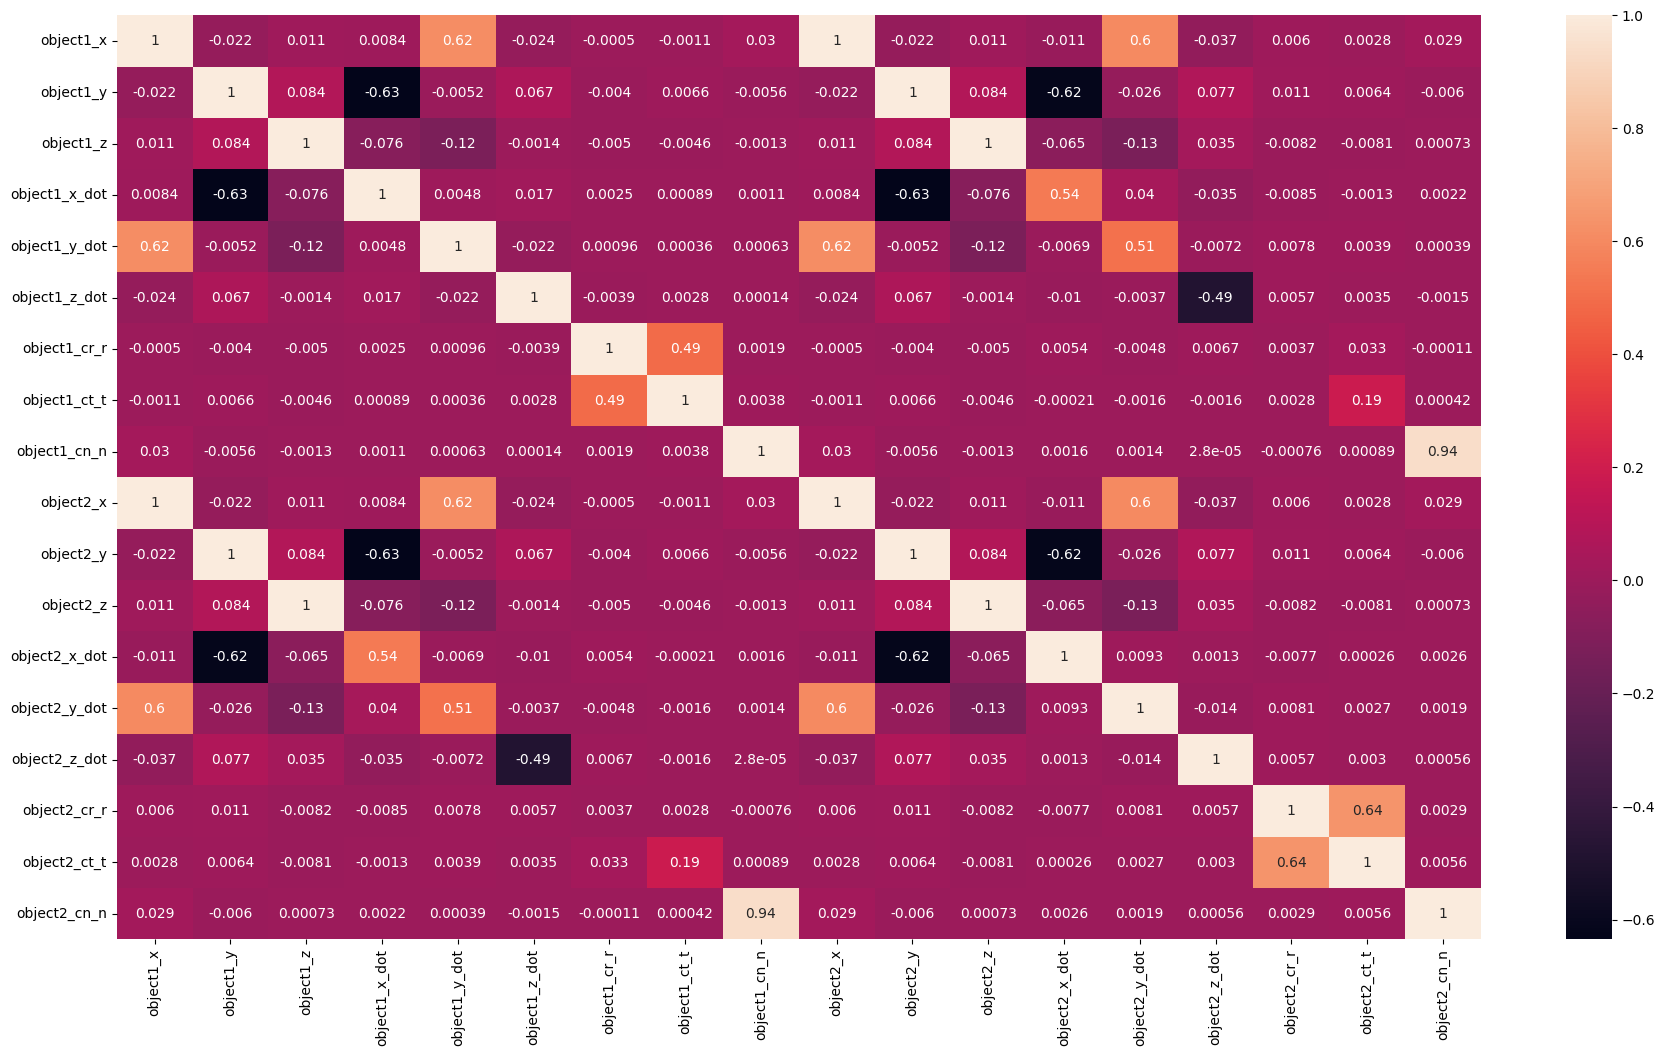

In [57]:
plt.figure(figsize=(22,12))
sns.heatmap(df_copy1.corr(), annot =True)

<Axes: title={'center': 'Correlation with collision'}>

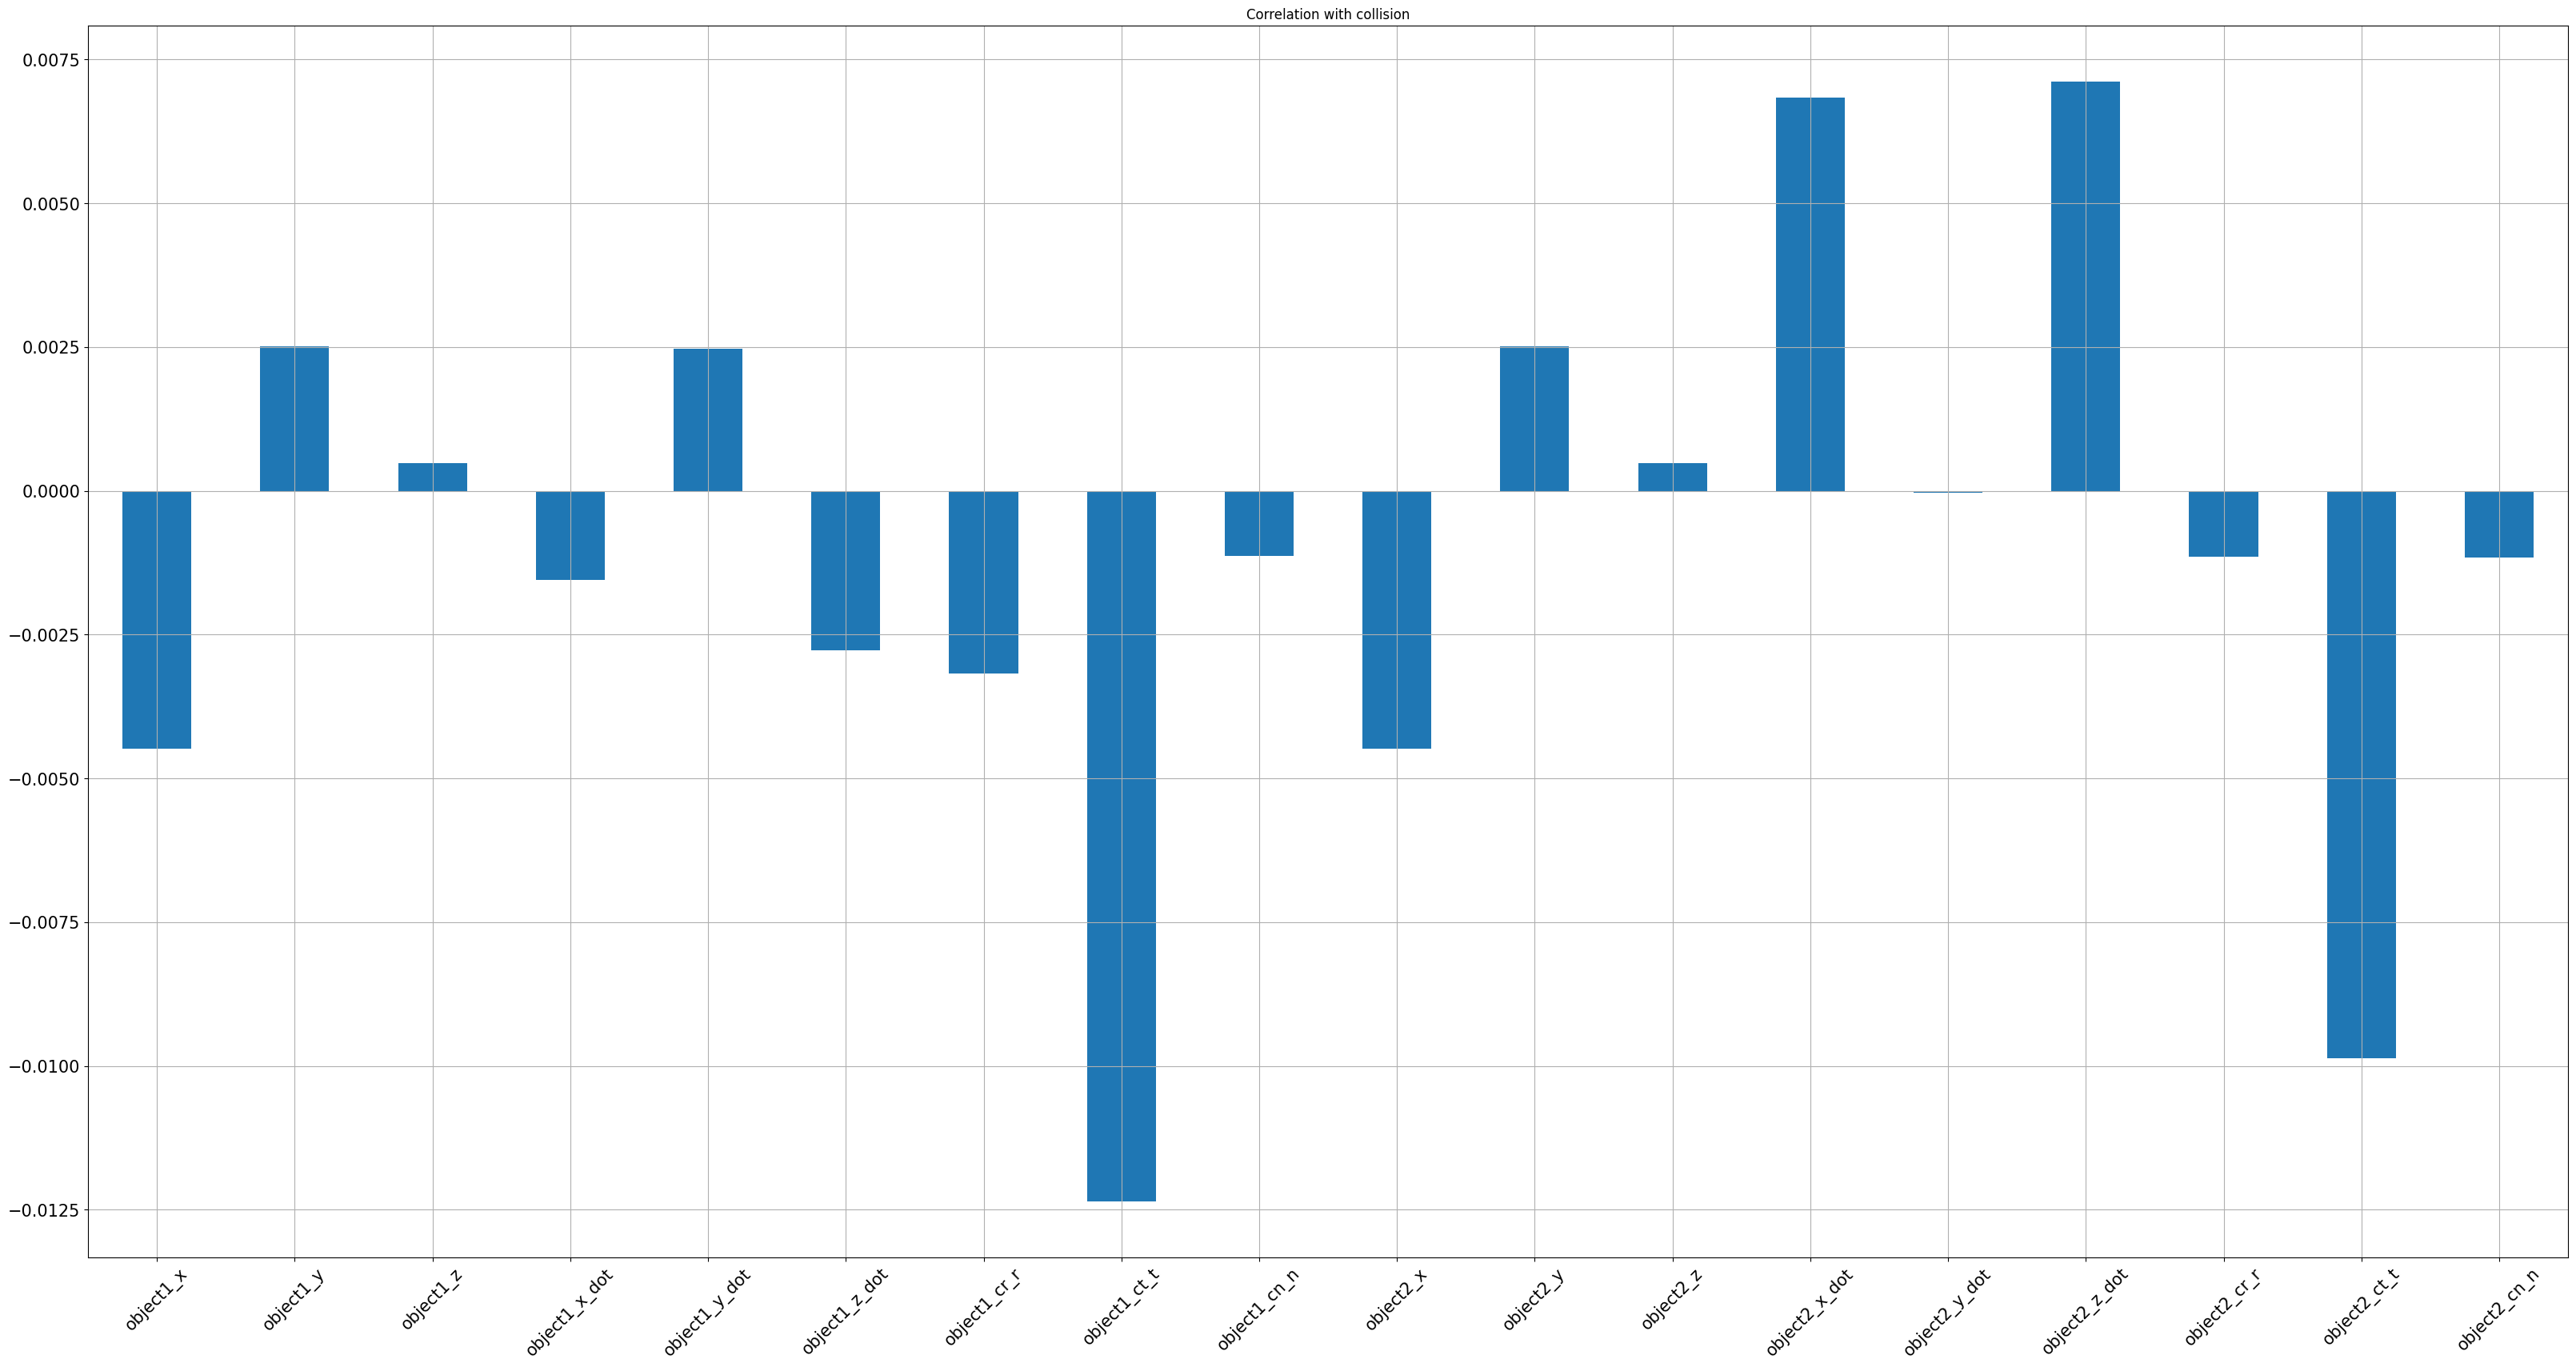

In [58]:
df_copy1.corrwith(df.collision_probability).plot.bar(figsize=(40,20),title="Correlation with collision",fontsize=15,rot=45,grid=True)

In [59]:
from sklearn.feature_selection import mutual_info_regression
# Identify potential numeric columns that are of object type
object_cols = X_train.select_dtypes(include='object').columns
numeric_object_cols = []
for col in object_cols:
  # Attempt to convert to numeric, coercing errors to NaN
  X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
  # If the column now has a numeric dtype (and wasn't all NaN before conversion), add it to the list
  if pd.api.types.is_numeric_dtype(X_train[col]) and not X_train[col].isna().all():
    numeric_object_cols.append(col)


# Select original numeric columns and the successfully converted numeric columns
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
all_numeric_cols = list(set(numeric_cols + numeric_object_cols))

X_train_numeric = X_train[all_numeric_cols]

# Fill remaining NaNs
X_train_numeric_cleaned = X_train_numeric.fillna(X_train_numeric.mean())

# Drop columns that still contain NaN values after filling
X_train_numeric_cleaned = X_train_numeric_cleaned.dropna(axis=1)

# Use the cleaned data for mutual information calculation
y_train_cleaned = y_train
mutual_info = mutual_info_regression(X_train_numeric_cleaned, y_train_cleaned)
mutual_info

array([0.00000000e+00, 1.09207027e-02, 4.43228966e-05, 5.45032985e-04,
       2.67866113e-02, 0.00000000e+00, 0.00000000e+00, 1.99623817e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.98871538e-04,
       3.38676450e-02, 1.91780118e-01, 2.91123805e-02, 1.44537144e-01,
       4.82100569e-05, 4.92938389e-02, 7.21154548e-02, 3.25502280e-01,
       0.00000000e+00, 1.96491503e-01, 0.00000000e+00, 6.82446566e-01,
       1.65992474e-01, 0.00000000e+00, 4.17926310e-04, 4.84305735e-01,
       1.95317953e-01, 1.51824122e-01, 2.06240428e-01, 3.12563882e-02,
       5.23926799e-02, 1.57398744e-01, 1.50520757e-01, 3.95964975e-04,
       0.00000000e+00, 0.00000000e+00, 2.02404822e-02, 0.00000000e+00,
       5.03493816e-01, 2.64739561e-02, 1.50631431e-01, 0.00000000e+00,
       0.00000000e+00, 3.81865831e-02, 0.00000000e+00, 1.50225523e-01,
       0.00000000e+00, 4.89027519e-04, 1.65447824e-01, 1.44298018e-01,
       1.56417176e-01, 0.00000000e+00, 1.64922543e-01, 0.00000000e+00,
      

In [62]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
selected_top_columns = SelectPercentile(mutual_info_regression,percentile=20)
# Fit using the numeric subset of X_train that has been cleaned of NaNs
selected_top_columns.fit(X_train_numeric_cleaned,y_train_cleaned)
# Get the names of the selected columns from the numeric subset
new_X_columns = X_train_numeric_cleaned.columns[selected_top_columns.get_support()]
new_X = X_train_numeric_cleaned[new_X_columns]

In [63]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_numeric_cleaned.columns
mutual_info.sort_values(ascending=False)

,0
collision_max_probability,0.682447
object1_ct_t,0.536343
object1_cr_r,0.503494
object2_ct_t,0.484306
object2_cr_r,0.454582
...,...
object1_ct_r,0.000000
object2_ctdot_r,0.000000
object1_crdot_n,0.000000
object2_ctdot_t,0.000000


<Axes: >

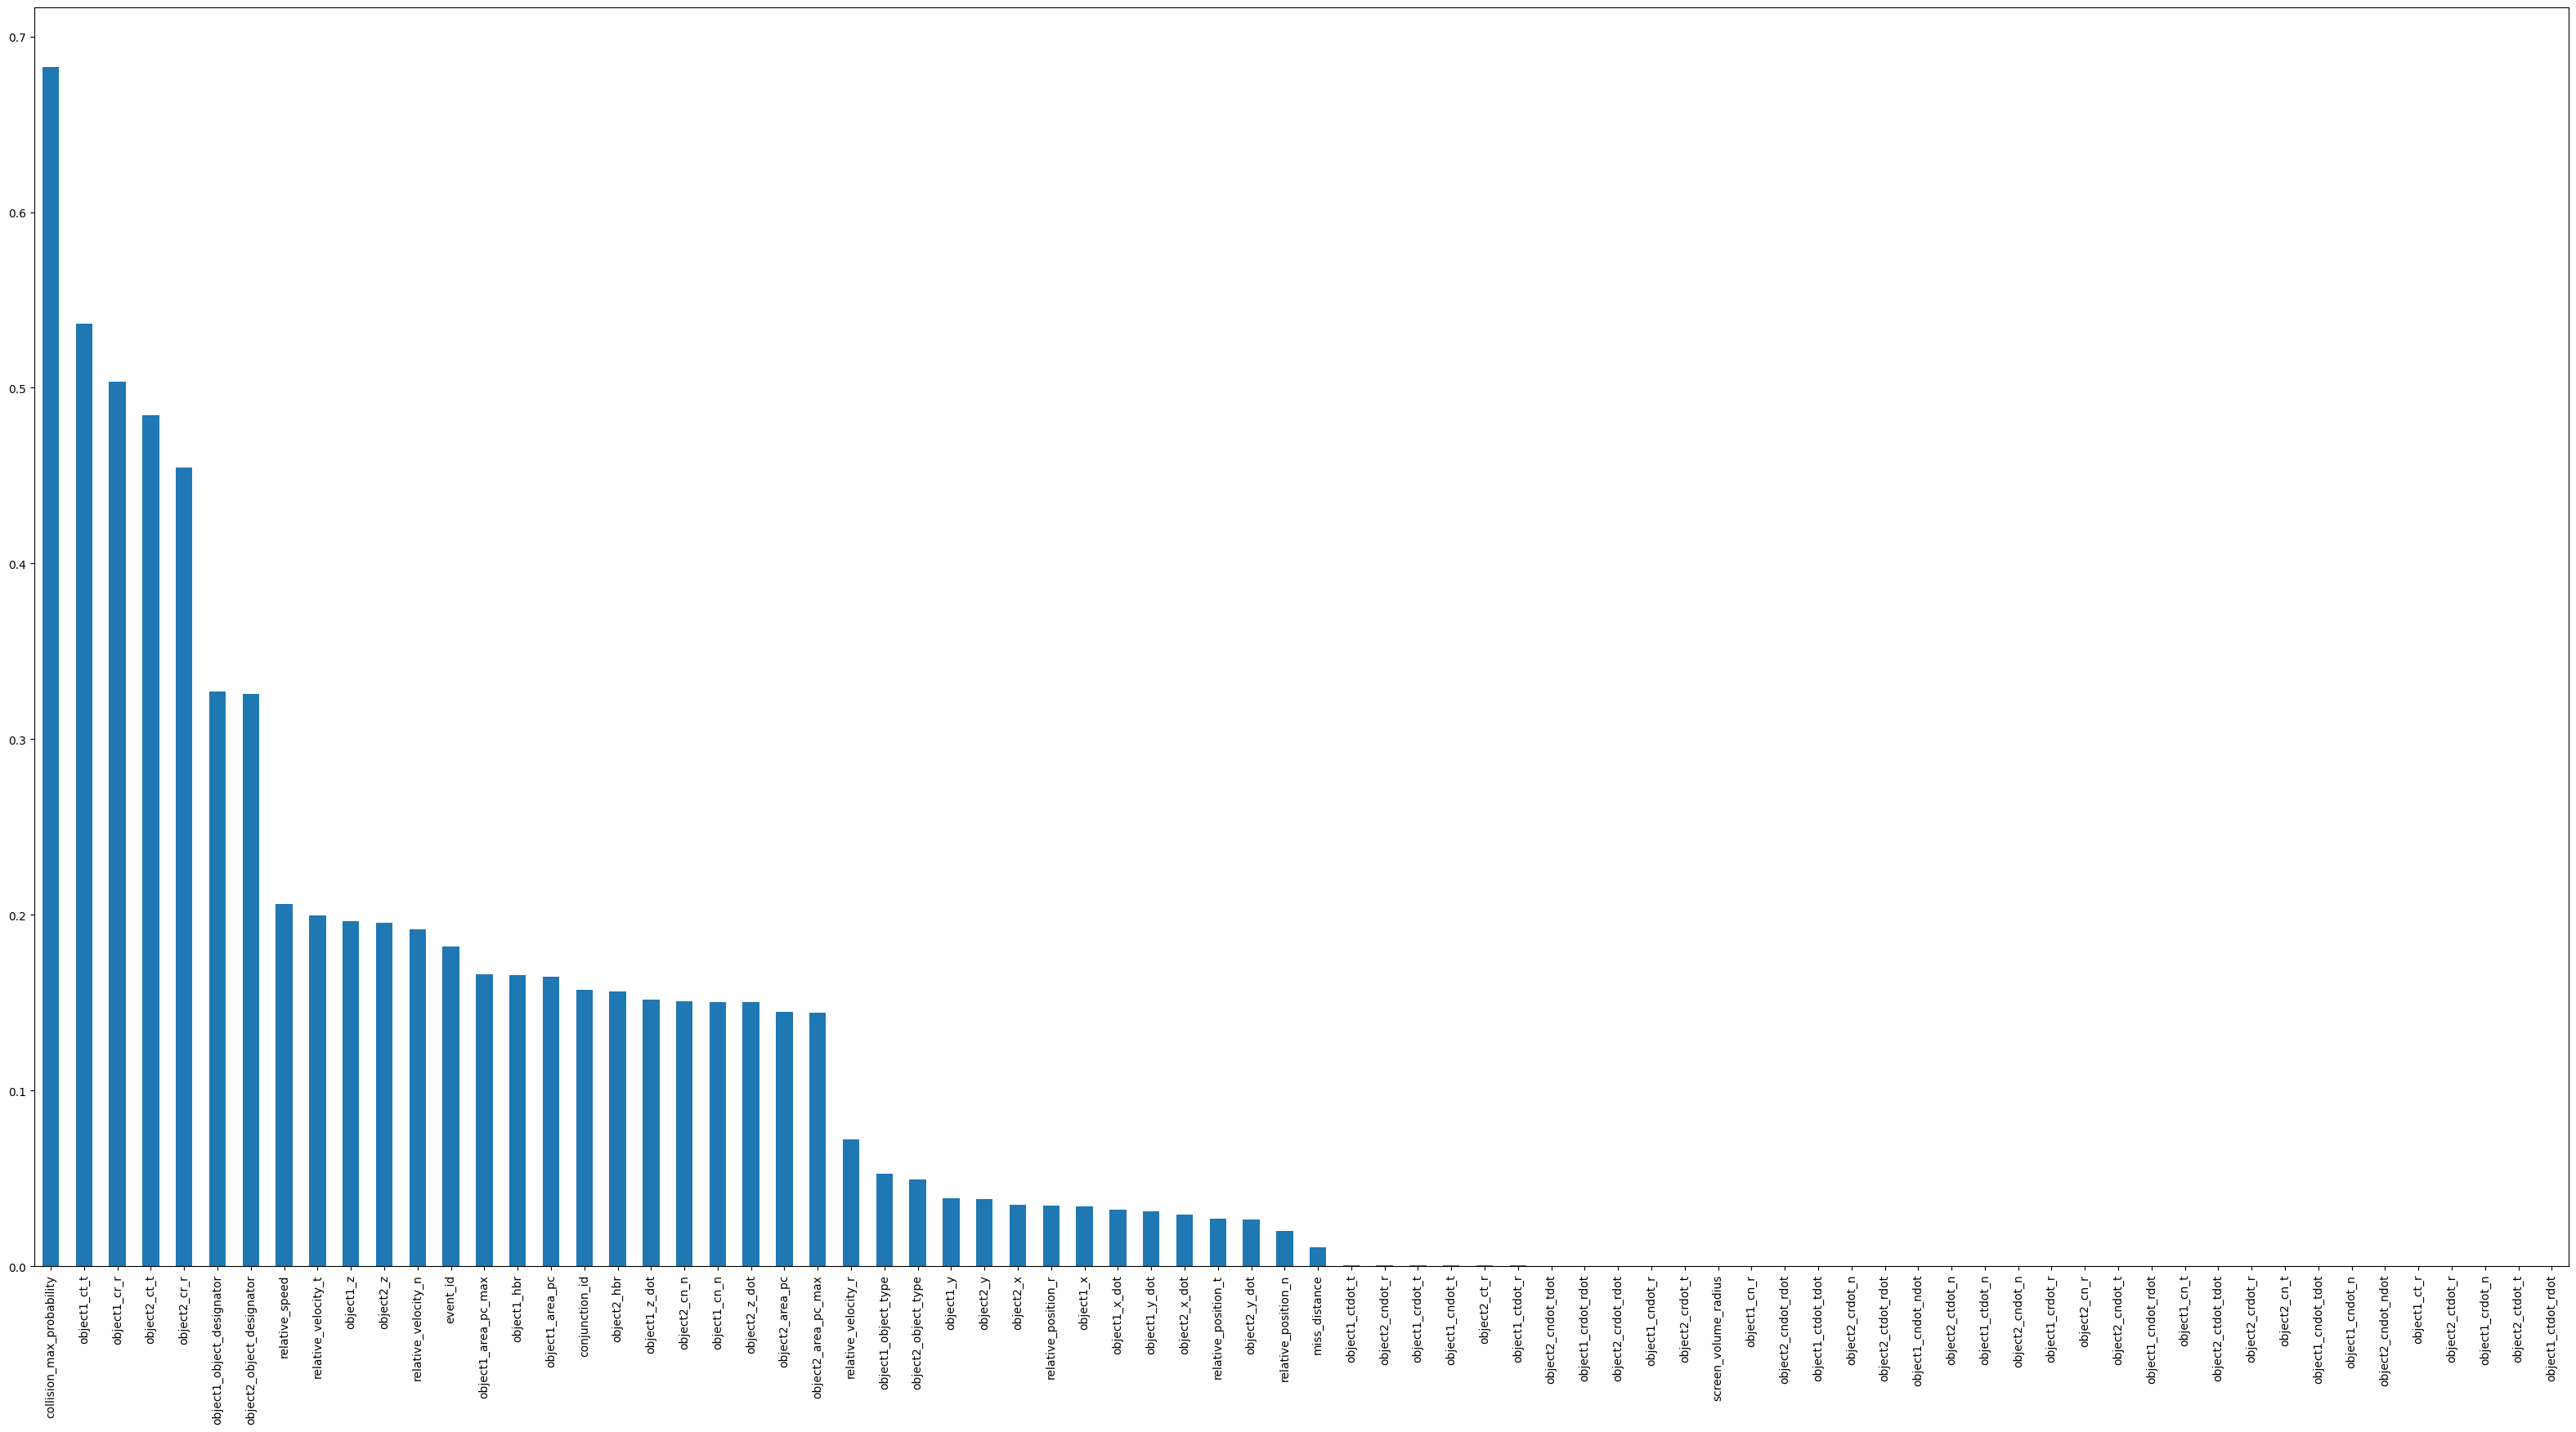

In [64]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(40,20))

In [65]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
selected_top_columns = SelectPercentile(mutual_info_regression,percentile=20)
# Fit using the numeric subset of X_train
selected_top_columns.fit(X_train_numeric_cleaned,y_train_cleaned)
# Get the names of the selected columns from the numeric subset
new_X_columns = X_train_numeric_cleaned.columns[selected_top_columns.get_support()]
new_X=X_train_numeric_cleaned[new_X_columns]

# model = SelectKBest(chi2,k=2)
# new = model.fit(X,y)

In [66]:
df_copy_new = df[new_X_columns]
df_copy_new

,relative_velocity_t,relative_velocity_n,object2_object_designator,object1_z,collision_max_probability,object2_ct_t,object2_z,relative_speed,object1_cr_r,object1_hbr,object1_area_pc,object2_cr_r,event_id,object1_ct_t,object1_object_designator
0,-1135.346865,-3994.315309,47823,5399.277384,0.000133,1.989763e+09,5399.200077,4152.541202,2.130721e+05,7.672985,184.960325,2.867134e+05,3059662,5.259101e+08,46786
1,-3278.221296,5921.859118,53855,-5100.413493,0.000400,1.753180e+08,-5100.336417,6774.705183,5.302366e+02,2.338269,17.176658,3.399556e+04,3108026,7.628666e+04,20262
2,-4275.065873,-6820.976228,57256,-3504.373298,0.000001,2.378292e+09,-3504.303427,8049.963408,1.783395e+06,1.000000,3.141593,2.130810e+05,3062731,4.826276e+09,56690
3,-6108.392397,7446.112075,45658,4351.852406,0.000007,7.862251e+10,4351.751153,9631.056058,2.758998e+06,7.672985,184.960325,5.006078e+07,2896647,8.777956e+09,46753
4,-75.714885,1066.605487,56411,-4717.357071,0.000001,5.928740e+08,-4717.585577,1069.289496,1.444834e+07,1.000000,3.141593,7.632742e+04,3030325,6.335244e+07,58227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185506,-6102.356098,-7435.216088,48695,-4356.561015,0.000007,1.050451e+10,-4356.665783,9618.794587,4.279180e+07,7.672985,184.960325,1.054432e+06,13044740,8.807693e+10,48391
185507,-1418.247231,4414.566960,45569,-5373.801041,0.000006,9.742896e+07,-5373.477238,4636.791118,1.491004e+06,7.672985,184.960325,8.476243e+03,13034454,1.089808e+10,48563
185508,-3187.167738,6176.313155,47894,-5103.113947,0.000002,1.135270e+11,-5103.273695,6950.171927,4.596356e+07,7.672985,184.960325,1.280477e+08,13044734,9.255328e+10,48391
185509,-1421.990189,-4424.167811,47149,5363.287882,0.000008,8.384520e+09,5363.077844,4647.079751,3.196341e+07,7.672985,184.960325,4.505862e+05,13045885,5.837794e+10,48386


In [67]:
print(new_X.isnull().any().any())

False


In [69]:
# The code `print(df[new_X].isnull().sum())` is incorrect as 'new_X' is a DataFrame.
# If you intended to check for nulls in the 'new_X' DataFrame, use:
# print(new_X.isnull().sum())
# This check is already performed in the subsequent cell 'joAZNSqtPPgx'.


In [70]:
print(new_X.isnull().sum())

relative_velocity_t          0
relative_velocity_n          0
object2_object_designator    0
object1_z                    0
collision_max_probability    0
object2_ct_t                 0
object2_z                    0
relative_speed               0
object1_cr_r                 0
object1_hbr                  0
object1_area_pc              0
object2_cr_r                 0
event_id                     0
object1_ct_t                 0
object1_object_designator    0
dtype: int64


In [71]:
new_X = df_copy_new.interpolate(limit_direction='both')
new_X

,relative_velocity_t,relative_velocity_n,object2_object_designator,object1_z,collision_max_probability,object2_ct_t,object2_z,relative_speed,object1_cr_r,object1_hbr,object1_area_pc,object2_cr_r,event_id,object1_ct_t,object1_object_designator
0,-1135.346865,-3994.315309,47823,5399.277384,0.000133,1.989763e+09,5399.200077,4152.541202,2.130721e+05,7.672985,184.960325,2.867134e+05,3059662,5.259101e+08,46786
1,-3278.221296,5921.859118,53855,-5100.413493,0.000400,1.753180e+08,-5100.336417,6774.705183,5.302366e+02,2.338269,17.176658,3.399556e+04,3108026,7.628666e+04,20262
2,-4275.065873,-6820.976228,57256,-3504.373298,0.000001,2.378292e+09,-3504.303427,8049.963408,1.783395e+06,1.000000,3.141593,2.130810e+05,3062731,4.826276e+09,56690
3,-6108.392397,7446.112075,45658,4351.852406,0.000007,7.862251e+10,4351.751153,9631.056058,2.758998e+06,7.672985,184.960325,5.006078e+07,2896647,8.777956e+09,46753
4,-75.714885,1066.605487,56411,-4717.357071,0.000001,5.928740e+08,-4717.585577,1069.289496,1.444834e+07,1.000000,3.141593,7.632742e+04,3030325,6.335244e+07,58227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185506,-6102.356098,-7435.216088,48695,-4356.561015,0.000007,1.050451e+10,-4356.665783,9618.794587,4.279180e+07,7.672985,184.960325,1.054432e+06,13044740,8.807693e+10,48391
185507,-1418.247231,4414.566960,45569,-5373.801041,0.000006,9.742896e+07,-5373.477238,4636.791118,1.491004e+06,7.672985,184.960325,8.476243e+03,13034454,1.089808e+10,48563
185508,-3187.167738,6176.313155,47894,-5103.113947,0.000002,1.135270e+11,-5103.273695,6950.171927,4.596356e+07,7.672985,184.960325,1.280477e+08,13044734,9.255328e+10,48391
185509,-1421.990189,-4424.167811,47149,5363.287882,0.000008,8.384520e+09,5363.077844,4647.079751,3.196341e+07,7.672985,184.960325,4.505862e+05,13045885,5.837794e+10,48386


In [72]:
print(np.any(np.isnan(new_X)))

False


In [73]:
new_y = df.collision_probability
new_y

,collision_probability
0,3.418000e-06
1,2.093830e-05
2,1.844090e-08
3,7.100090e-08
4,2.045680e-08
...,...
185506,6.763880e-08
185507,9.093400e-07
185508,2.207340e-08
185509,8.399640e-08


In [74]:
new_X = df_copy_new
new_y = df.collision_probability
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.4, random_state=100)

In [75]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Drop rows with NaN values in both new_X_train and new_y_train
valid_indices = new_y_train.dropna().index
new_X_train_cleaned = new_X_train.loc[valid_indices]
new_y_train_cleaned = new_y_train.loc[valid_indices]

regressor_rf.fit(new_X_train_cleaned,new_y_train_cleaned)

RandomForestRegressor(random_state=0)

In [76]:
# Drop rows with NaN values in both new_X_test and new_y_test
valid_indices_test = new_y_test.dropna().index
new_X_test_cleaned = new_X_test.loc[valid_indices_test]
new_y_test_cleaned = new_y_test.loc[valid_indices_test]

accuracy_rf = regressor_rf.score(new_X_test_cleaned,new_y_test_cleaned)
accuracy_rf

0.5921891529523016

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# from sklearn import metrics
from sklearn.metrics import confusion_matrix
predR_rf = regressor_rf.predict(new_X_test_cleaned)
rmseR_rf = np.sqrt(mean_squared_error(new_y_test_cleaned, predR_rf))
mseR_rf=mean_squared_error(new_y_test_cleaned,predR_rf)
maeR_rf=mean_absolute_error(new_y_test_cleaned,predR_rf)
r2R_rf=r2_score(new_y_test_cleaned,predR_rf)
result1=[rmseR_rf,mseR_rf,maeR_rf,r2R_rf]
df_R_rf = pd.DataFrame({'RandomForestRegressor':result1},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_rf

,RandomForestRegressor
RMSE:,2.861764e-04
MSE:,8.189693e-08
MAE:,1.326161e-05
R2-score:,5.921892e-01


In [78]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
# Drop rows with NaN values in both new_X_train and new_y_train
valid_indices_train = new_y_train.dropna().index
new_X_train_cleaned = new_X_train.loc[valid_indices_train]
new_y_train_cleaned = new_y_train.loc[valid_indices_train]
regressor_lr.fit(new_X_train_cleaned,new_y_train_cleaned)

LinearRegression()

In [79]:
# Drop rows with NaN values in both new_X_test and new_y_test
valid_indices_test = new_y_test.dropna().index
new_X_test_cleaned = new_X_test.loc[valid_indices_test]
new_y_test_cleaned = new_y_test.loc[valid_indices_test]

accuracy_lr = regressor_lr.score(new_X_test_cleaned,new_y_test_cleaned)
accuracy_lr

0.04555946002060485

In [80]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_lr = regressor_lr.predict(new_X_test_cleaned)
rmseR_lr = np.sqrt(mean_squared_error(new_y_test_cleaned, predR_lr))
mseR_lr=mean_squared_error(new_y_test_cleaned,predR_lr)
maeR_lr=mean_absolute_error(new_y_test_cleaned,predR_lr)
r2R_lr=r2_score(new_y_test_cleaned,predR_lr)
result2=[rmseR_lr,mseR_lr,maeR_lr,r2R_lr]
df_R_lr = pd.DataFrame({'Linear Regression':result2},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_lr

,Linear Regression
RMSE:,4.378031e-04
MSE:,1.916716e-07
MAE:,5.633250e-05
R2-score:,4.555946e-02


In [81]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
regressor_rr = Ridge(alpha=0.5)

# Drop rows with NaN values in both new_X_train and new_y_train
valid_indices_train = new_y_train.dropna().index
new_X_train_cleaned = new_X_train.loc[valid_indices_train]
new_y_train_cleaned = new_y_train.loc[valid_indices_train]

regressor_rr.fit(new_X_train_cleaned,new_y_train_cleaned)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.12102e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Ridge(alpha=0.5)

In [82]:
accuracy_rr = regressor_rr.score(new_X_test_cleaned,new_y_test_cleaned)
accuracy_rr

0.31178363058404435

In [83]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_rr = regressor_rr.predict(new_X_test_cleaned)
rmseR_rr = np.sqrt(mean_squared_error(new_y_test_cleaned, predR_rr))
mseR_rr=mean_squared_error(new_y_test_cleaned,predR_rr)
maeR_rr=mean_absolute_error(new_y_test_cleaned,predR_rr)
r2R_rr=r2_score(new_y_test_cleaned,predR_rr)
result4=[rmseR_rr,mseR_rr,maeR_rr,r2R_rr]
df_R_rr = pd.DataFrame({'Ridge Regression':result4},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_rr

,Ridge Regression
RMSE:,3.717637e-04
MSE:,1.382082e-07
MAE:,4.206585e-05
R2-score:,3.117836e-01


In [84]:
regressor_ls = Lasso(alpha=0.25)

# Drop rows with NaN values in both new_X_train and new_y_train
valid_indices_train = new_y_train.dropna().index
new_X_train_cleaned = new_X_train.loc[valid_indices_train]
new_y_train_cleaned = new_y_train.loc[valid_indices_train]

regressor_ls.fit(new_X_train_cleaned,new_y_train_cleaned)

Lasso(alpha=0.25)

In [85]:
accuracy_ls = regressor_ls.score(new_X_test_cleaned,new_y_test_cleaned)
accuracy_ls

0.0021994426910574294

In [86]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_ls = regressor_ls.predict(new_X_test_cleaned)
rmseR_ls = np.sqrt(mean_squared_error(new_y_test_cleaned, predR_ls))
mseR_ls=mean_squared_error(new_y_test_cleaned,predR_ls)
maeR_ls=mean_absolute_error(new_y_test_cleaned,predR_ls)
r2R_ls=r2_score(new_y_test_cleaned,predR_ls)
result5=[rmseR_ls,mseR_ls,maeR_ls,r2R_ls]
df_R_ls = pd.DataFrame({'lasso Regression':result5},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_ls

,lasso Regression
RMSE:,4.476373e-04
MSE:,2.003792e-07
MAE:,3.364766e-05
R2-score:,2.199443e-03


In [87]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
regressor_rr = Ridge(alpha=0.5)

# Drop rows with NaN values in both new_X_train and new_y_train
valid_indices_train = new_y_train.dropna().index
new_X_train_cleaned = new_X_train.loc[valid_indices_train]
new_y_train_cleaned = new_y_train.loc[valid_indices_train]

regressor_rr.fit(new_X_train_cleaned,new_y_train_cleaned)

#train and test scorefor ridge regression
# train_score_ridge = regression_ridgeReg.score(X_train, y_train)
# test_score_ridge = regression_ridgeReg.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.12102e-25): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Ridge(alpha=0.5)

In [88]:
# Drop rows with NaN values in both new_X_test and new_y_test
valid_indices_test = new_y_test.dropna().index
new_X_test_cleaned = new_X_test.loc[valid_indices_test]
new_y_test_cleaned = new_y_test.loc[valid_indices_test]

accuracy_rr = regressor_rr.score(new_X_test_cleaned,new_y_test_cleaned)
accuracy_rr

0.31178363058404435

In [89]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_rr = regressor_rr.predict(new_X_test_cleaned)
rmseR_rr = np.sqrt(mean_squared_error(new_y_test_cleaned, predR_rr))
mseR_rr=mean_squared_error(new_y_test_cleaned,predR_rr)
maeR_rr=mean_absolute_error(new_y_test_cleaned,predR_rr)
r2R_rr=r2_score(new_y_test_cleaned,predR_rr)
result4=[rmseR_rr,mseR_rr,maeR_rr,r2R_rr]
df_R_rr = pd.DataFrame({'Ridge Regression':result4},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_rr

,Ridge Regression
RMSE:,3.717637e-04
MSE:,1.382082e-07
MAE:,4.206585e-05
R2-score:,3.117836e-01


In [90]:
regressor_ls = Lasso(alpha=0.25)

# Drop rows with NaN values in both new_X_train and new_y_train
valid_indices_train = new_y_train.dropna().index
new_X_train_cleaned = new_X_train.loc[valid_indices_train]
new_y_train_cleaned = new_y_train.loc[valid_indices_train]

regressor_ls.fit(new_X_train_cleaned,new_y_train_cleaned)

Lasso(alpha=0.25)

In [91]:
accuracy_ls = regressor_ls.score(new_X_test_cleaned,new_y_test_cleaned)
accuracy_ls

0.0021994426910574294

In [92]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
predR_ls = regressor_ls.predict(new_X_test_cleaned)
rmseR_ls = np.sqrt(mean_squared_error(new_y_test_cleaned, predR_ls))
mseR_ls=mean_squared_error(new_y_test_cleaned,predR_ls)
maeR_ls=mean_absolute_error(new_y_test_cleaned,predR_ls)
r2R_ls=r2_score(new_y_test_cleaned,predR_ls)
result5=[rmseR_ls,mseR_ls,maeR_ls,r2R_ls]
df_R_ls = pd.DataFrame({'lasso Regression':result5},index=['RMSE:','MSE:','MAE:','R2-score:'])
df_R_ls

,lasso Regression
RMSE:,4.476373e-04
MSE:,2.003792e-07
MAE:,3.364766e-05
R2-score:,2.199443e-03


In [93]:
result = pd.DataFrame({'RandomForestRegressor':result1,'Linear Regression':result2,'Ridge Regression':result4,'Lasso Regression':result5},index=['RMSE:','MSE:','MAE:','R2-score:'])
result

,RandomForestRegressor,Linear Regression,Ridge Regression,Lasso Regression
RMSE:,2.861764e-04,4.378031e-04,3.717637e-04,4.476373e-04
MSE:,8.189693e-08,1.916716e-07,1.382082e-07,2.003792e-07
MAE:,1.326161e-05,5.633250e-05,4.206585e-05,3.364766e-05
R2-score:,5.921892e-01,4.555946e-02,3.117836e-01,2.199443e-03


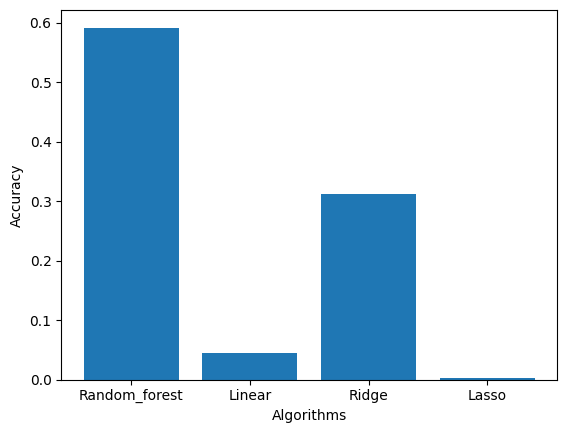

In [94]:
x_lst = ['Random_forest','Linear','Ridge','Lasso',]
r2_score_lst =[]
r2_score_lst.append(accuracy_rf)
r2_score_lst.append(accuracy_lr)
r2_score_lst.append(accuracy_rr)
r2_score_lst.append(accuracy_ls)

plt.bar(x_lst, r2_score_lst)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.show()